In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datei einlesen
netz = gpd.read_file("../../data/Rohdaten/FussVeloNetz_geojson/data/taz_mm.tbl_routennetz.json")

# Grundlegende Infos
print("Datentypen:")
print(netz.dtypes)

print("\nNullwerte pro Spalte:")
print(netz.isnull().sum().sort_values(ascending=False))

print("\nForm:", netz.shape)

print("\nErste 5 Zeilen:")
print(netz.head())

print("\nEindeutige Werte pro Spalte:")
print(netz.nunique().sort_values(ascending=False))

print("\nDoppelte Zeilen:", netz.duplicated().sum())
print("Doppelte Geometrien:", netz.geometry.duplicated().sum())

print("\nSpalten mit nur einem Wert:")
print(netz.columns[netz.nunique() <= 1])


Datentypen:
id1                    int32
velo                   int32
velostreifen          object
veloweg                int32
einbahn               object
fuss                   int32
name                  object
map_velo               int32
map_fuss               int32
se_anno_cad_data      object
objectid              object
geometry            geometry
dtype: object

Nullwerte pro Spalte:
se_anno_cad_data    40292
name                    8
velostreifen            1
id1                     0
velo                    0
veloweg                 0
einbahn                 0
fuss                    0
map_velo                0
map_fuss                0
objectid                0
geometry                0
dtype: int64

Form: (40292, 12)

Erste 5 Zeilen:
    id1  velo velostreifen  veloweg einbahn  fuss  \
0   642     0            0        0       0     1   
1   910     0            0        0       0     1   
2   808     1            0        0       0     0   
3  1139     0            0    

### 📝 Datenprüfung: Fuss- und Velowegnetz Zürich (`taz_mm.tbl_routennetz.json`)

Der Datensatz umfasst das **städtische Routennetz für den Fuss- und Veloverkehr** in Zürich und enthält insgesamt **40'292 Liniensegmente** mit zugehörigen Attributen und Geometrien.

**Datenstruktur:**
- Die Geometrie basiert auf `LINESTRING`-Objekten, was ideal für Routing-, Erreichbarkeits- oder Netzanalysen ist.
- Es sind 12 Spalten vorhanden, wobei 11 davon inhaltlich relevant sind (eine davon leer).
- Wichtige numerische Merkmale wie `velo`, `veloweg`, `map_velo`, `fuss`, `map_fuss` sind als `int32` kodiert und ermöglichen die gezielte Filterung nach Verkehrsart.
- Die Spalte `name` gibt (sofern vorhanden) den Namen der Strasse an.

**Nullwerte:**
- Die Spalte `se_anno_cad_data` ist **vollständig leer** (40'292 Nullwerte) → kann gelöscht werden.
- Weitere Spalten mit vereinzelten Nullwerten sind `name` (8x) und `velostreifen` (1x) → kein Handlungsbedarf.

**Doppelte Einträge:**
- Es existieren **22 doppelte Geometrien**, jedoch keine komplett doppelten Zeilen. Eine Bereinigung der doppelten Liniengeometrien ist optional, je nach Analyseziel.

**Eindeutige Werte:**
- Die Spalten `velo`, `veloweg`, `fuss` beinhalten binäre Werte (0 = nein, 1 = ja) → gut für Klassifizierung und Filterung.
- Weitere Attribute wie `velostreifen`, `einbahn`, `map_velo`, `map_fuss` weisen wenige diskrete Ausprägungen auf und eignen sich für Kategorisierung und visuelle Analyse.
- Die Strassennamen (`name`) enthalten 4'160 eindeutige Einträge – hilfreich für spätere Kontextanalysen oder Kartenbeschriftungen.

**Fazit:**
Der Datensatz bietet eine **sehr gute Grundlage für Netz- und Zugänglichkeitsanalysen**. Die Attribute erlauben gezielte Abfragen nach Fusswegen, Velowegen, Einbahnregelung und kartografischer Relevanz. Die einzige inhaltlich irrelevante Spalte ist `se_anno_cad_data` (vollständig leer). Der Datensatz kann direkt für **Spatial Joins**, **Distanzanalysen**, **Erreichbarkeits-Heatmaps** oder als Layer in QGIS und Python-Visualisierungen verwendet werden.


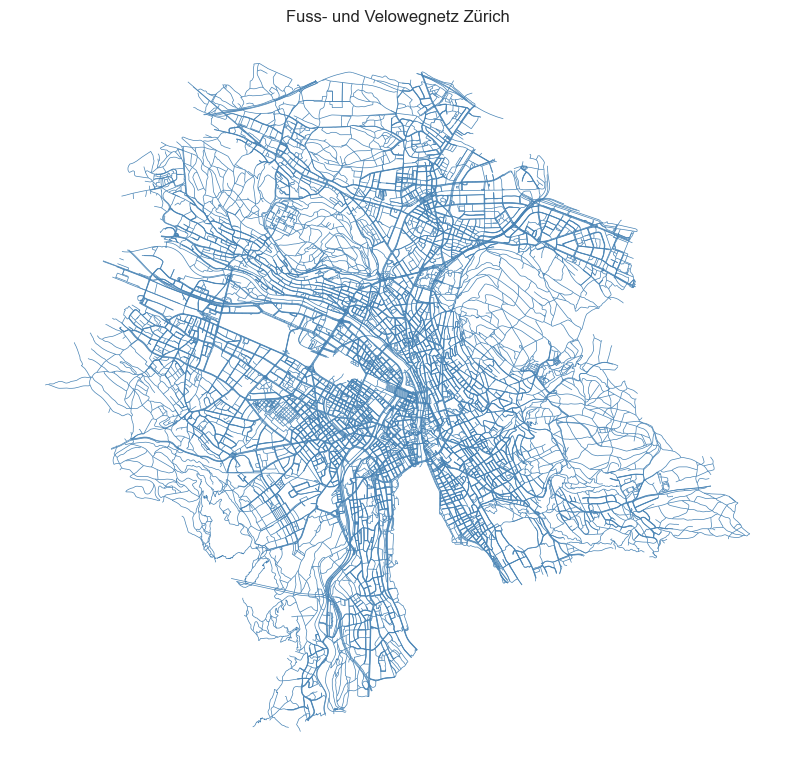

In [3]:
# Übersichtskarte des Routennetzes
netz.plot(figsize=(10, 10), linewidth=0.5, edgecolor='steelblue')
plt.title("Fuss- und Velowegnetz Zürich")
plt.axis("off")
plt.show()
